# Webscraping From Amazon
---
- Target:
  Get `Category`, `rating`, and `ratings` for products from corresponding Amazon category.
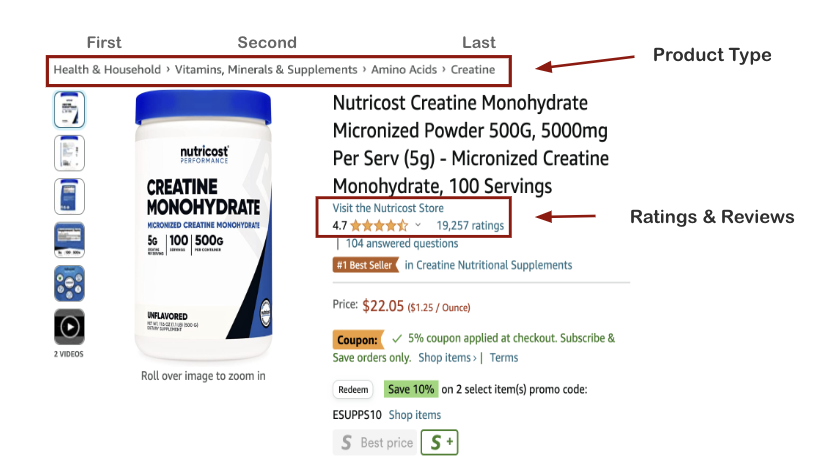

In [4]:
# Packages

# Web Scraping
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException

import warnings
warnings.filterwarnings('ignore')

## 1 Example

In [8]:
# Options
options = Options()
#options.add_argument('--headless) # Headless mode allows the browser to run in the background without a graphical user interface (GUI)
options.add_argument('--no-sandbox') # 
options.add_argument('--disable-dev-shm-usage')

# Driver
service = Service('path/to/chromedriver')
driver = webdriver.Chrome(service = service, options = options)
url = 'https://www.amazon.com/dp/B00GL2HMES'
driver.get(url)
wait = WebDriverWait(driver, 10)

Incompatible release of chromedriver (version 96.0.4664.45) detected in PATH: /usr/local/bin/chromedriver


#### (i) Scrape Category

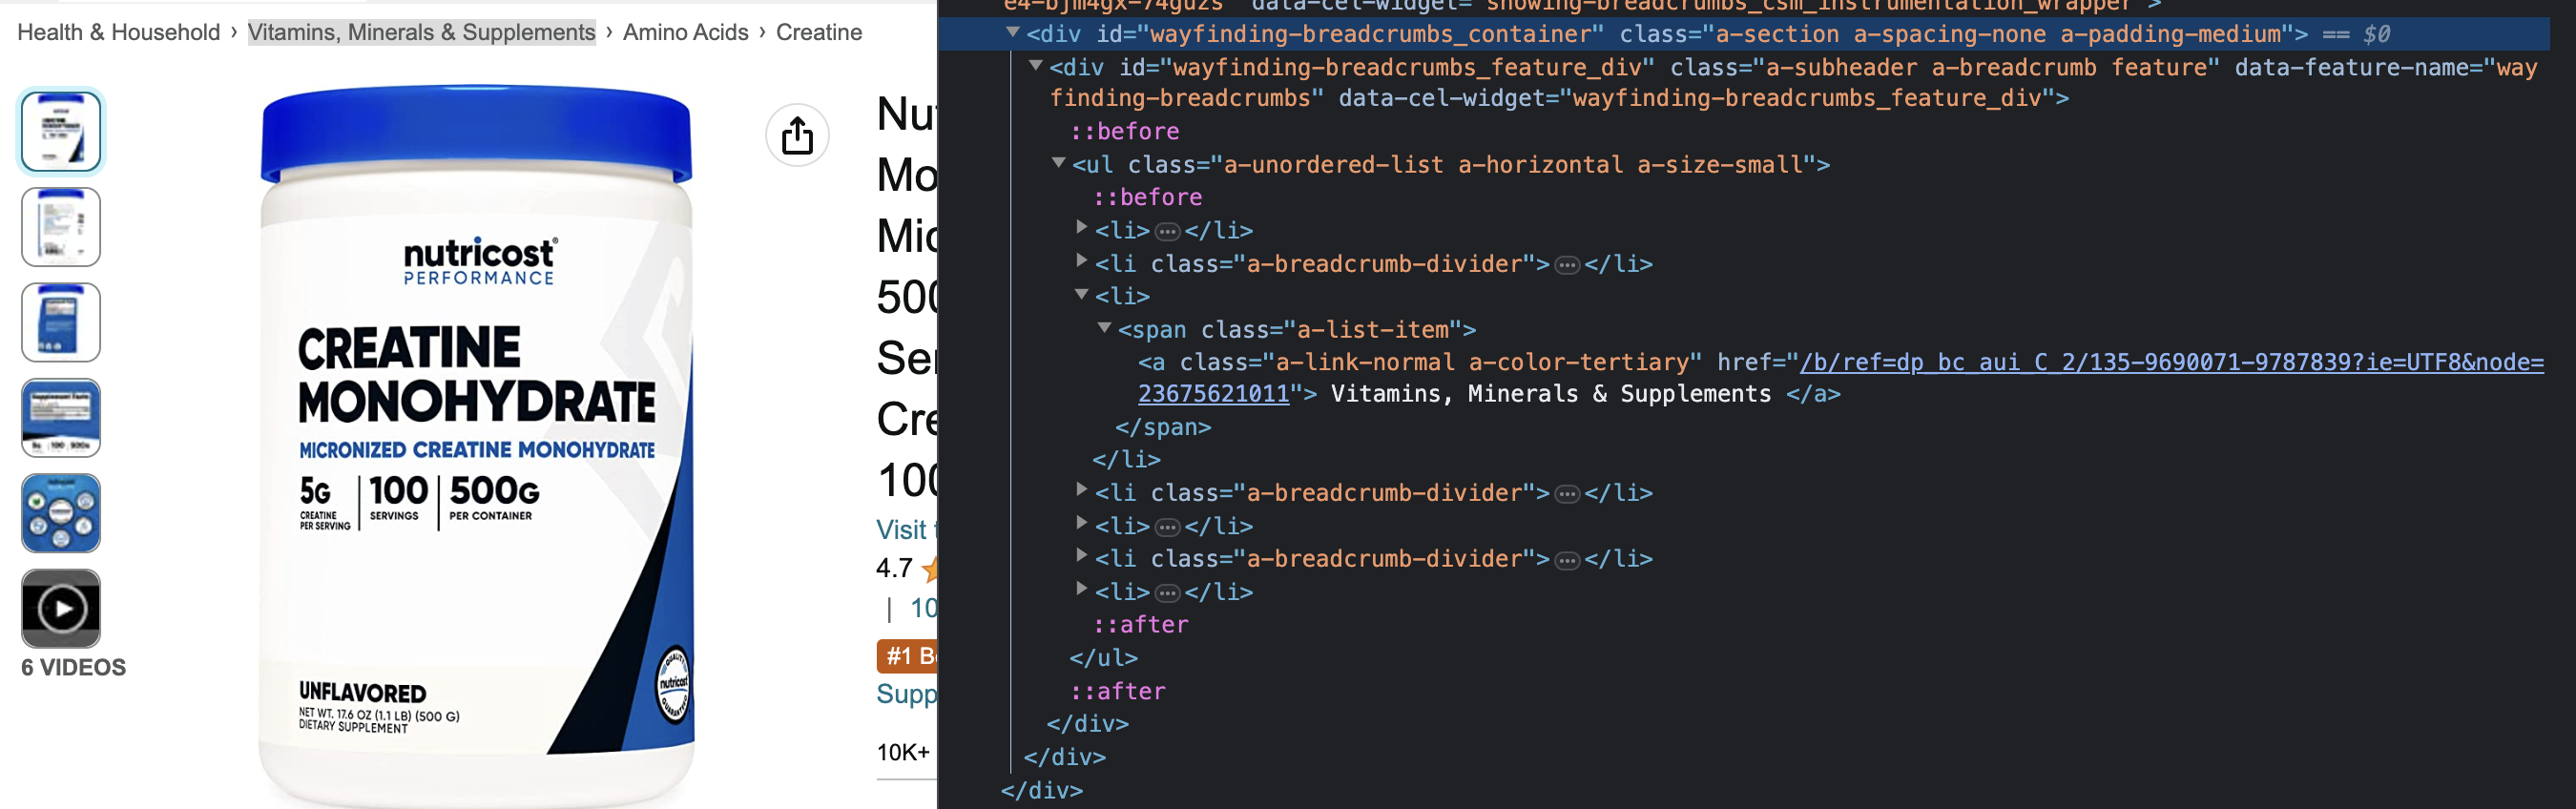
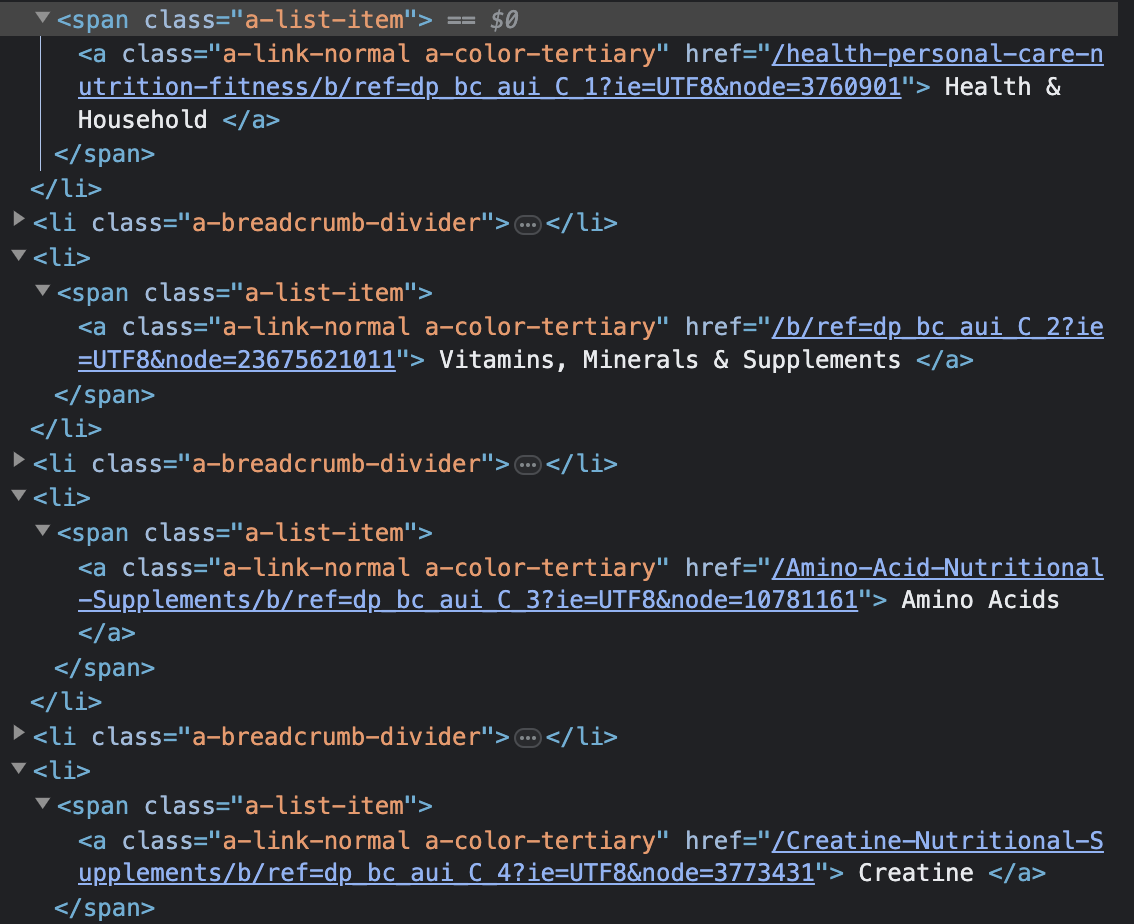

In [23]:
try:
    container = driver.find_element(By.ID, 'wayfinding-breadcrumbs_container')
    # or driver.find_element(By.CSS_SELECTOR, "ul.a-unordered-list.a-horizontal.a-size-small")
    span_elements = container.find_elements(By.TAG_NAME, 'span')
    cats = [element.text for element in span_elements]
except NoSuchElementException:
    cats = []

In [24]:
cats

['Health & Household',
 '›',
 'Vitamins, Minerals & Supplements',
 '›',
 'Amino Acids',
 '›',
 'Creatine']

#### (ii) Rating and Ratings
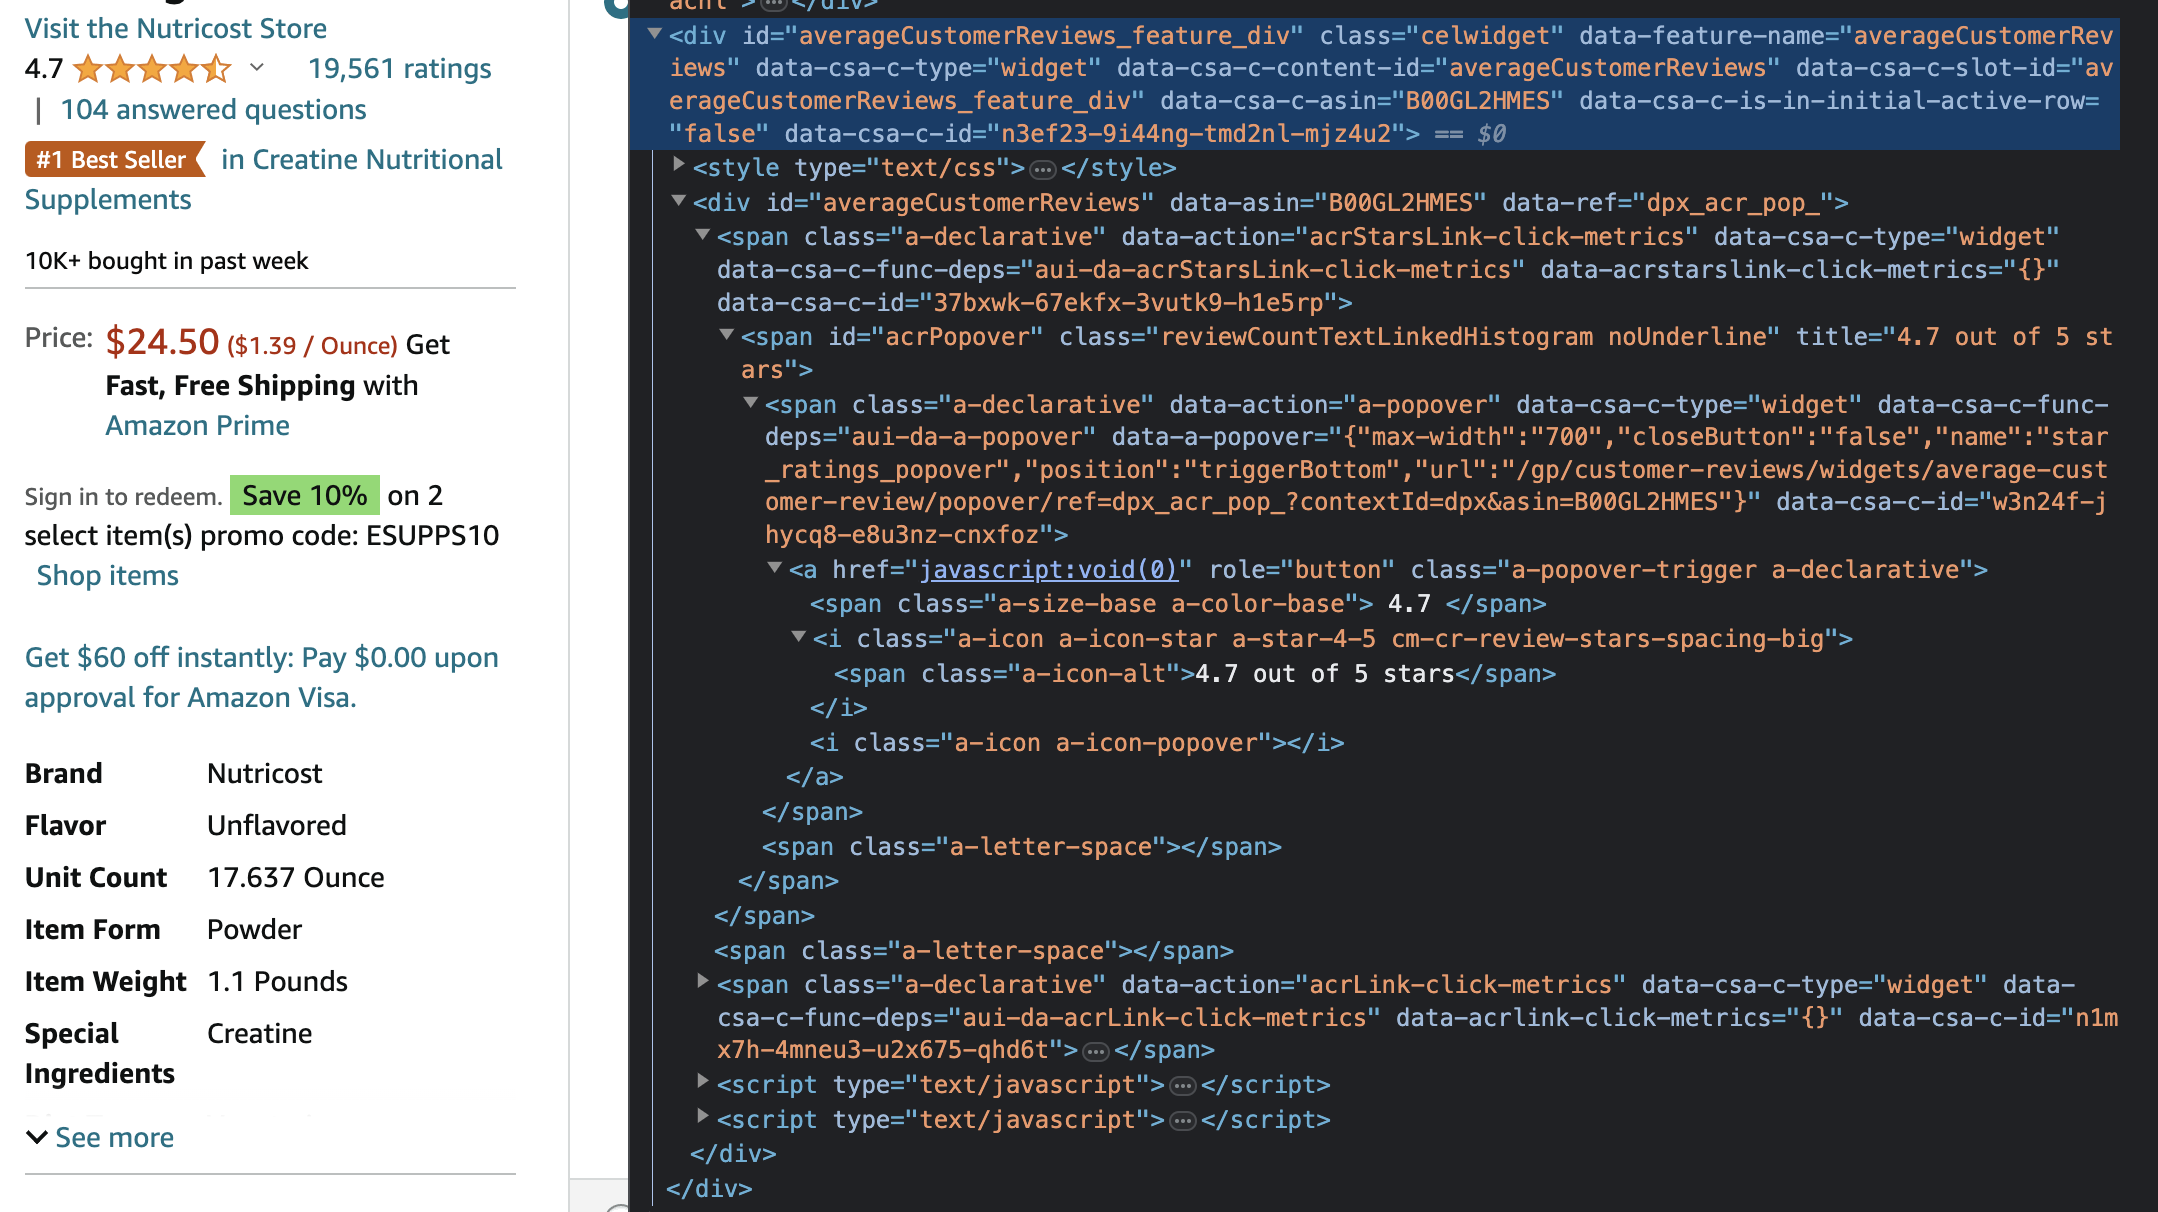
1. rating
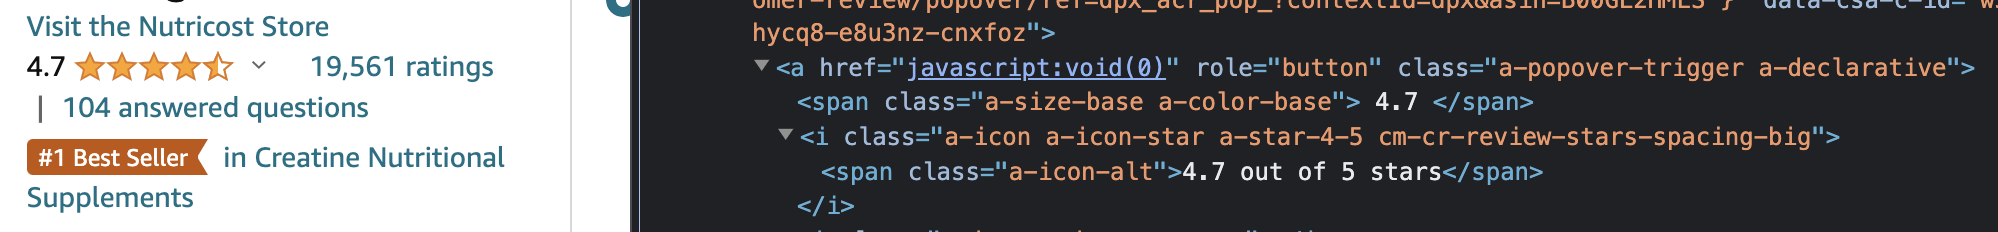
2. ratings
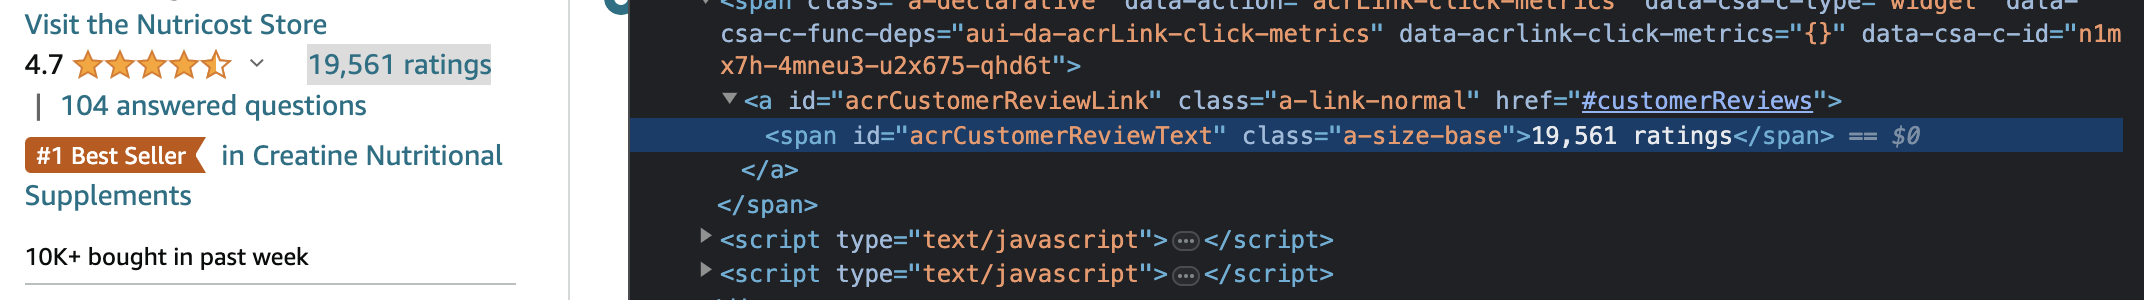

In [28]:
try:
    Reviews = driver.find_element(By.ID, 'averageCustomerReviews_feature_div')
    rating = Reviews.find_element(By.CSS_SELECTOR, '.a-size-base.a-color-base').text
except NoSuchElementException:
    rating = 'No'

try:
    ratings = driver.find_element(By.ID, 'acrCustomerReviewText').text
except NoSuchElementException:
    ratings = 'No'
    

In [29]:
print('rating:', rating)
print('ratings:', ratings)

rating: 4.7
ratings: 19,561 ratings


## 2 Automation

In [31]:
def scrape_product_information(asin):
    # Options
    options = Options()
    #options.add_argument('Applications--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')

    # Driver
    service = Service('path/to/chromedriver')
    driver = webdriver.Chrome(service=service, options=options)
    url = f'https://www.amazon.com/dp/{asin}'
    driver.get(url)
    wait = WebDriverWait(driver, 10)

    try:
        container = driver.find_element(By.ID, 'wayfinding-breadcrumbs_container')
        span_elements = container.find_elements(By.TAG_NAME, 'span')
        cats = [element.text for element in span_elements]
    except NoSuchElementException:
        try: # Other Situations
            product_details = driver.find_element(By.ID, 'detailBulletsWrapper_feature_div')
            cats = product_details.find_element(By.XPATH, "//span[contains(text(), 'Best Sellers Rank')]/parent::span").text
        except NoSuchElementException:
            try:
                product_details = driver.find_element(By.ID, 'prodDetails')
                cats = product_details.find_element(By.XPATH, "//th[contains(text(), 'Best Sellers Rank')]/following-sibling::td/span/span").text
            except NoSuchElementException:
                cats = 'No'
            
    try:
        Reviews = driver.find_element(By.ID, 'averageCustomerReviews')
        rating = Reviews.find_element(By.CSS_SELECTOR, '.a-size-base.a-color-base').text
    except NoSuchElementException:
        rating = 'No'
    
    try:
        ratings = driver.find_element(By.ID, 'acrCustomerReviewText').text
    except:
        ratings = 'No'
    
    driver.quit()

    return rating, ratings, cats

In [32]:
asin = 'B00GL2HMES'
rating, ratings, cats = scrape_product_information(asin)

print(f"Product Rating: {rating}")
print(f"# Product Ratings: {ratings}")
print(cats)

Incompatible release of chromedriver (version 96.0.4664.45) detected in PATH: /usr/local/bin/chromedriver


Product Rating: 4.7
# Product Ratings: 19,561 ratings
['Health & Household', '›', 'Vitamins, Minerals & Supplements', '›', 'Amino Acids', '›', 'Creatine']
